In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [4]:
images, labels = C.Util.load(DATAPATH)

In [5]:
images, labels = C.Util.shuffle(images, labels)

In [6]:
images, labels = C.Util.normalize(images, labels)

In [7]:
X_train, X_val, y_train, y_val = C.Util.split_1(images, labels, val_size=0.2)

In [8]:
train_gen = C.Util.augment(X_train, y_train)

2023-04-24 14:40:20.545287: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [9]:
model = C.Util.create_unet(images[0].shape)

2023-04-24 14:40:35.952277: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-24 14:40:36.141521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-24 14:40:36.144174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-24 14:40:36.144196: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-24 14:40:36.160749: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-24 

In [10]:
model, history = C.Util.train_unet(train_gen, X_train, y_train, X_val, y_val, model, epochs=200)

2023-04-24 14:40:38.644247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-24 14:40:38.665171: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-04-24 14:40:39.894084: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-24 14:40:41.359016: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-24 14:40:43.039400: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-24 14:40:43.039424: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-24 14:40:43.040213: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-24 14:40:43.134860: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-24 14:40:44.572602: I tensorflow/stream_exec

20/20 [==============================] - 59s 2s/step - loss: 0.4146 - iou: 1.1425e-04 - iou_thresholded: 6.0222e-04 - val_loss: 0.0111 - val_iou: 2.4437e-04 - val_iou_thresholded: 7.5942e-04
Epoch 2/200
20/20 [==============================] - 19s 975ms/step - loss: 0.0063 - iou: 2.7337e-04 - iou_thresholded: 6.7666e-04 - val_loss: 0.0036 - val_iou: 2.9744e-04 - val_iou_thresholded: 7.5942e-04
Epoch 3/200
20/20 [==============================] - 19s 967ms/step - loss: 0.0023 - iou: 4.0111e-04 - iou_thresholded: 6.8972e-04 - val_loss: 0.0021 - val_iou: 3.8116e-04 - val_iou_thresholded: 7.5942e-04
Epoch 4/200
20/20 [==============================] - 19s 972ms/step - loss: 0.0021 - iou: 4.6669e-04 - iou_thresholded: 7.2302e-04 - val_loss: 0.0018 - val_iou: 5.7694e-04 - val_iou_thresholded: 7.5942e-04
Epoch 5/200
20/20 [==============================] - 19s 971ms/step - loss: 0.0019 - iou: 5.6135e-04 - iou_thresholded: 7.3279e-04 - val_loss: 0.0017 - val_iou: 6.2203e-04 - val_iou_threshold

Epoch 42/200
20/20 [==============================] - 20s 976ms/step - loss: 4.9206e-04 - iou: 0.2659 - iou_thresholded: 0.3825 - val_loss: 4.0637e-04 - val_iou: 0.3001 - val_iou_thresholded: 0.4436
Epoch 43/200
20/20 [==============================] - 19s 971ms/step - loss: 4.7216e-04 - iou: 0.2757 - iou_thresholded: 0.3910 - val_loss: 3.9733e-04 - val_iou: 0.3281 - val_iou_thresholded: 0.4192
Epoch 44/200
20/20 [==============================] - 19s 975ms/step - loss: 4.7612e-04 - iou: 0.2806 - iou_thresholded: 0.3902 - val_loss: 5.2116e-04 - val_iou: 0.2304 - val_iou_thresholded: 0.4636
Epoch 45/200
20/20 [==============================] - 19s 973ms/step - loss: 4.7335e-04 - iou: 0.2717 - iou_thresholded: 0.3979 - val_loss: 3.9485e-04 - val_iou: 0.3094 - val_iou_thresholded: 0.4718
Epoch 46/200
20/20 [==============================] - 19s 969ms/step - loss: 4.9097e-04 - iou: 0.2718 - iou_thresholded: 0.3802 - val_loss: 4.4020e-04 - val_iou: 0.3178 - val_iou_thresholded: 0.3775
Epoch

20/20 [==============================] - 19s 969ms/step - loss: 2.5728e-04 - iou: 0.4730 - iou_thresholded: 0.5938 - val_loss: 3.0324e-04 - val_iou: 0.4299 - val_iou_thresholded: 0.5825
Epoch 84/200
20/20 [==============================] - 19s 969ms/step - loss: 2.6049e-04 - iou: 0.4697 - iou_thresholded: 0.5927 - val_loss: 3.1212e-04 - val_iou: 0.4207 - val_iou_thresholded: 0.5776
Epoch 85/200
20/20 [==============================] - 19s 973ms/step - loss: 2.5219e-04 - iou: 0.4738 - iou_thresholded: 0.5925 - val_loss: 3.7294e-04 - val_iou: 0.3667 - val_iou_thresholded: 0.5443
Epoch 86/200
20/20 [==============================] - 19s 969ms/step - loss: 2.5145e-04 - iou: 0.4765 - iou_thresholded: 0.5965 - val_loss: 3.3378e-04 - val_iou: 0.3922 - val_iou_thresholded: 0.5585
Epoch 87/200
20/20 [==============================] - 19s 971ms/step - loss: 2.4337e-04 - iou: 0.4868 - iou_thresholded: 0.6019 - val_loss: 3.3998e-04 - val_iou: 0.3970 - val_iou_thresholded: 0.5541
Epoch 88/200
20/20

20/20 [==============================] - 19s 970ms/step - loss: 1.8944e-04 - iou: 0.5503 - iou_thresholded: 0.6629 - val_loss: 2.9565e-04 - val_iou: 0.4873 - val_iou_thresholded: 0.6021
Epoch 125/200
20/20 [==============================] - 19s 973ms/step - loss: 1.8273e-04 - iou: 0.5643 - iou_thresholded: 0.6719 - val_loss: 3.2816e-04 - val_iou: 0.4948 - val_iou_thresholded: 0.5933
Epoch 126/200
20/20 [==============================] - 19s 968ms/step - loss: 1.8073e-04 - iou: 0.5776 - iou_thresholded: 0.6794 - val_loss: 3.2961e-04 - val_iou: 0.4499 - val_iou_thresholded: 0.5699
Epoch 127/200
20/20 [==============================] - 19s 970ms/step - loss: 1.7735e-04 - iou: 0.5674 - iou_thresholded: 0.6734 - val_loss: 3.3276e-04 - val_iou: 0.4620 - val_iou_thresholded: 0.5666
Epoch 128/200
20/20 [==============================] - 19s 972ms/step - loss: 1.7819e-04 - iou: 0.5772 - iou_thresholded: 0.6809 - val_loss: 3.1724e-04 - val_iou: 0.4836 - val_iou_thresholded: 0.5877
Epoch 129/200


20/20 [==============================] - 19s 973ms/step - loss: 1.2548e-04 - iou: 0.6697 - iou_thresholded: 0.7581 - val_loss: 3.5788e-04 - val_iou: 0.5389 - val_iou_thresholded: 0.6054
Epoch 166/200
20/20 [==============================] - 19s 969ms/step - loss: 1.2569e-04 - iou: 0.6704 - iou_thresholded: 0.7605 - val_loss: 3.5900e-04 - val_iou: 0.5354 - val_iou_thresholded: 0.6017
Epoch 167/200
20/20 [==============================] - 19s 969ms/step - loss: 1.2207e-04 - iou: 0.6754 - iou_thresholded: 0.7648 - val_loss: 3.5740e-04 - val_iou: 0.5271 - val_iou_thresholded: 0.5900
Epoch 168/200
20/20 [==============================] - 19s 972ms/step - loss: 1.2214e-04 - iou: 0.6792 - iou_thresholded: 0.7680 - val_loss: 3.6255e-04 - val_iou: 0.5313 - val_iou_thresholded: 0.5954
Epoch 169/200
20/20 [==============================] - 19s 970ms/step - loss: 1.2397e-04 - iou: 0.6748 - iou_thresholded: 0.7633 - val_loss: 3.7121e-04 - val_iou: 0.5224 - val_iou_thresholded: 0.5912
Epoch 170/200


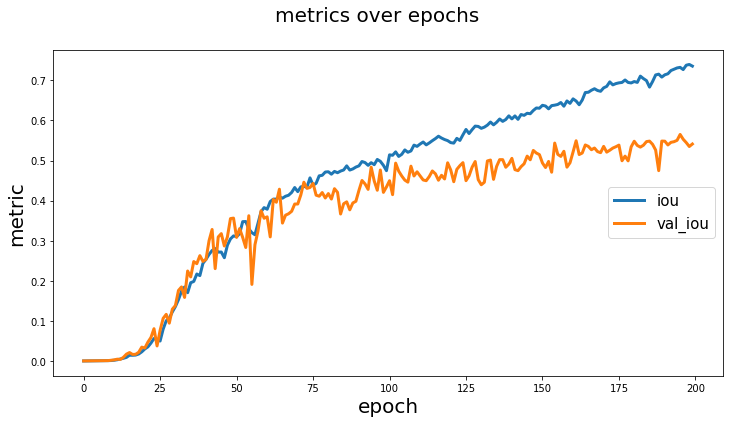

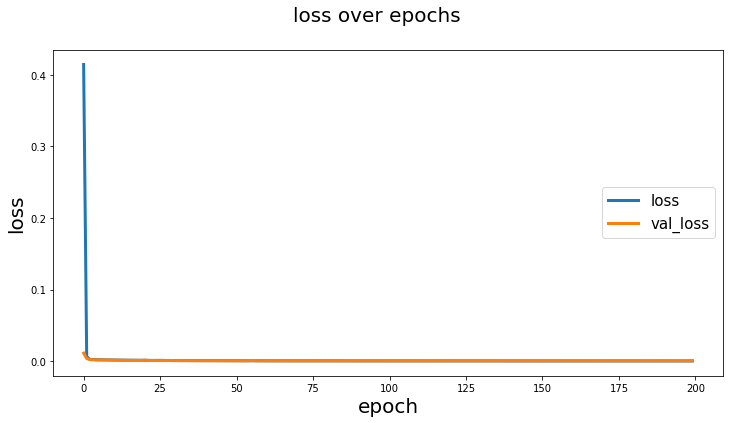

In [11]:
C.Util.visualize_graph(history)

In [12]:
y_pred = C.Util.prediction(X_val, model)

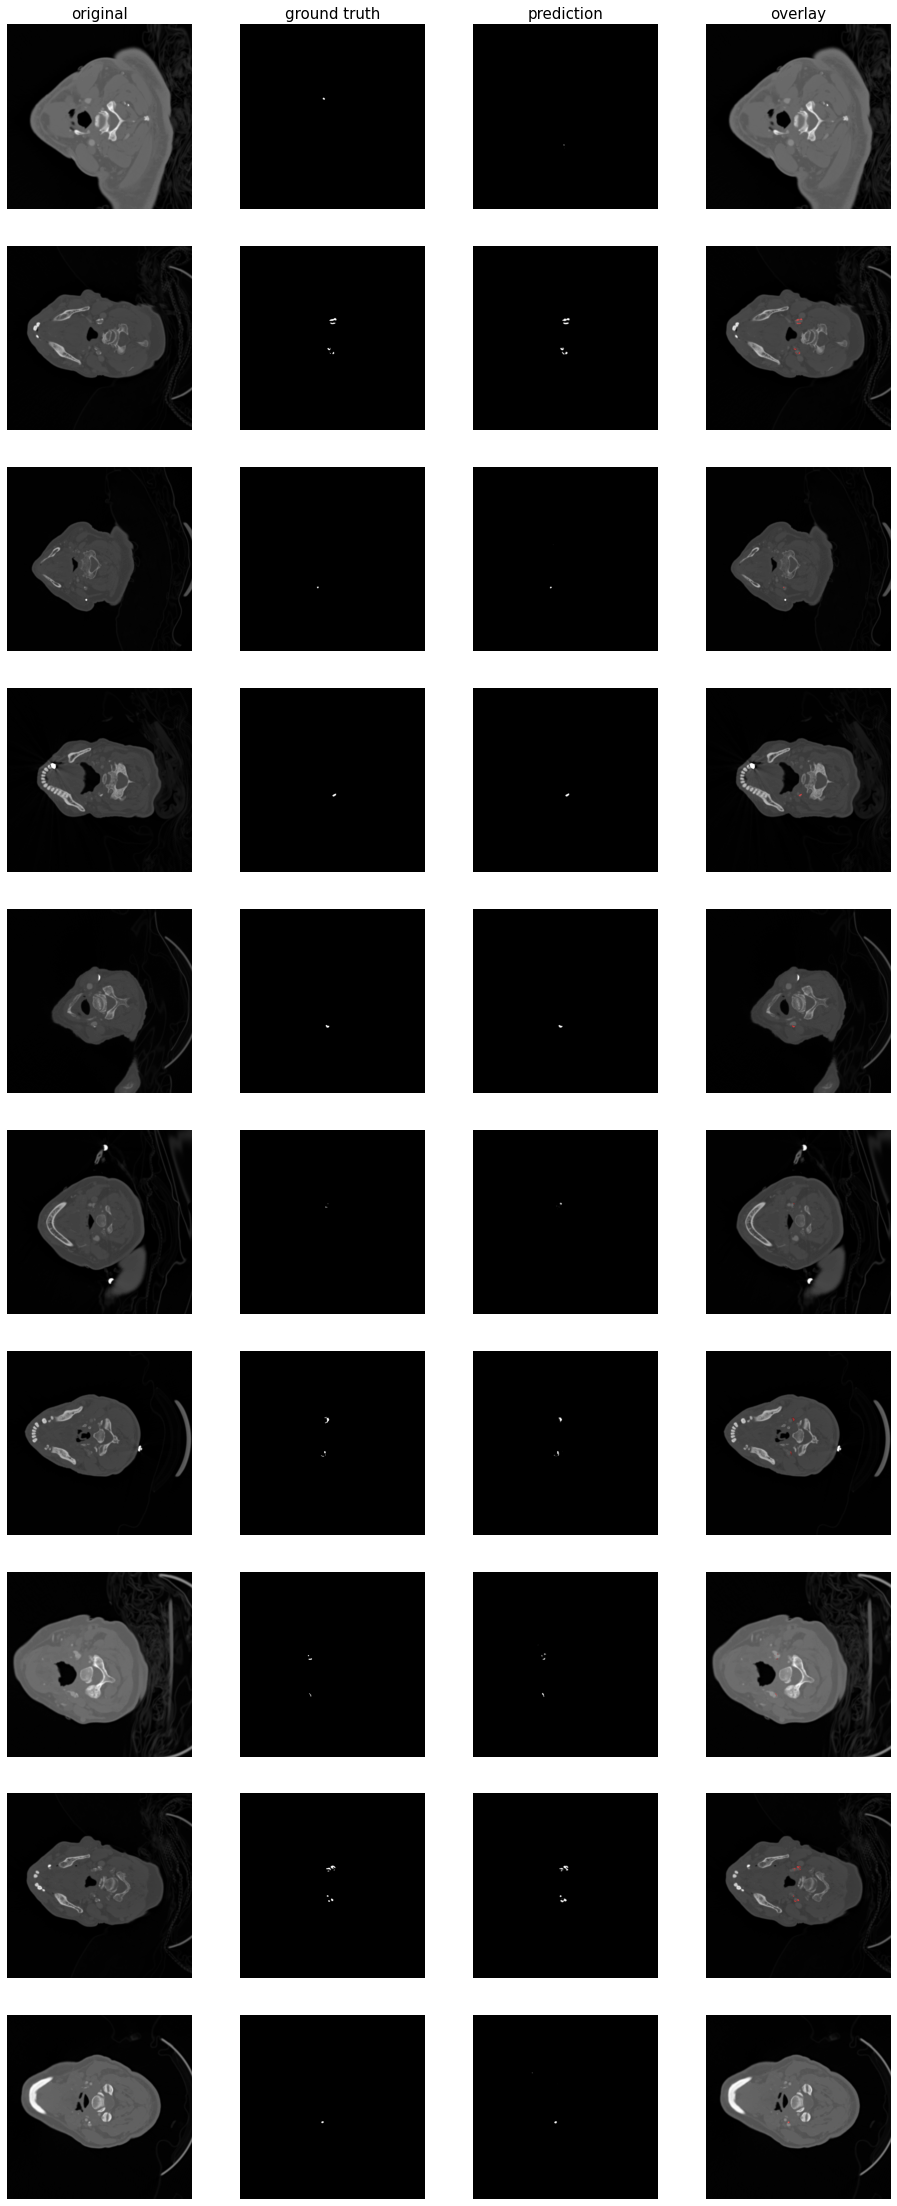

In [13]:
C.Util.visualize_result(X_val, y_val, y_pred)

In [14]:
C.Util.evaluate(X_val, y_val, model)

5/5 [==============================] - 1s 193ms/step - loss: 4.2082e-04 - iou: 0.5413 - iou_thresholded: 0.5870
